# Pre-procesamiento de Datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

## Lectura de las bases de datos

In [ ]:
df = pd.read_csv("Siderophore_DB.csv") # df va a ser nuestro target dataframe
df1 = pd.read_csv("Siderophore_DB1.csv") # df1 va a ser nuestro 1er categories dataframe
df2 = pd.read_csv("Siderophore_DB2.csv") # df2 va a ser nuestro 2do categories dataframe
df3 = pd.read_csv("Siderophore_DB3.csv") # df3 va a ser nuestro 3er categories dataframe

In [ ]:
df.shape

(221, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    221 non-null    object
 1   Compounds             221 non-null    object
 2   Microorganism         149 non-null    object
 3   hydroxamate           221 non-null    int64 
 4   catecholate           221 non-null    int64 
 5   a-hydroxycarboxylate  221 non-null    int64 
 6   carboxylate           221 non-null    int64 
 7   phenolate             221 non-null    int64 
 8   citrate               221 non-null    int64 
 9   other                 221 non-null    int64 
 10  SMILES                221 non-null    object
 11  validate smiles       221 non-null    bool  
 12  SMARTS                221 non-null    object
 13  SELFIES               221 non-null    object
dtypes: bool(1), int64(7), object(6)
memory usage: 22.8+ KB


## **DF TARGET**

## Eliminar columnas irrelevantes

In [ ]:
# nos quedaremos con las columnas que usaremos de target, columnas de 3 a 9
df_columns = df.columns
df_columns

Index(['ID', 'Compounds', 'Microorganism', 'hydroxamate', 'catecholate',
       'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other',
       'SMILES', 'validate smiles', 'SMARTS', 'SELFIES'],
      dtype='object')

In [ ]:
df = df.drop(['ID', 'Compounds', 'Microorganism', 'SMILES', 'validate smiles', 'SMARTS', 'SELFIES'], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   hydroxamate           221 non-null    int64
 1   catecholate           221 non-null    int64
 2   a-hydroxycarboxylate  221 non-null    int64
 3   carboxylate           221 non-null    int64
 4   phenolate             221 non-null    int64
 5   citrate               221 non-null    int64
 6   other                 221 non-null    int64
dtypes: int64(7)
memory usage: 12.2 KB


## Transformamos el df target a variables binarias

El objetivo de nuestro análisis será determinar si con los dataframes categóricos es posible determinar si el microorganismo o compuesto "tiene el sideróforo"

In [ ]:
df_target = df.copy()
df_target = df_target.replace([2, 3, 4],1)

### hydroxamate

In [ ]:
pd.value_counts(df_target['hydroxamate'], sort = True)

1    130
0     91
Name: hydroxamate, dtype: int64

### catecholate

In [ ]:
pd.value_counts(df_target['catecholate'], sort = True)

0    153
1     68
Name: catecholate, dtype: int64

### a-hydroxycarboxylate

In [ ]:
pd.value_counts(df_target['a-hydroxycarboxylate'], sort = True)

0    206
1     15
Name: a-hydroxycarboxylate, dtype: int64

### carboxylate

In [ ]:
pd.value_counts(df_target['carboxylate'], sort = True)

0    148
1     73
Name: carboxylate, dtype: int64

### phenolate

In [ ]:
pd.value_counts(df_target['phenolate'], sort = True)

0    202
1     19
Name: phenolate, dtype: int64

### citrate

In [ ]:
pd.value_counts(df_target['citrate'], sort = True)

0    202
1     19
Name: citrate, dtype: int64

### other

In [ ]:
pd.value_counts(df_target['other'], sort = True)

0    204
1     17
Name: other, dtype: int64

## **1er DF CATEGORICO**

## Eliminar columnas irrelevantes

In [ ]:
df1.head(3)

,ID,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,1,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,...,0,0,0,0,0,1,0,1,2,1
1,2,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,...,0,1,0,0,1,1,0,1,2,2
2,3,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,...,0,1,0,0,1,1,0,1,2,2


In [ ]:
df1 = df1.drop(['ID'], axis='columns')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 118 entries, MaxEStateIndex to fr_phenol_noOrthoHbond
dtypes: float64(86), int64(32)
memory usage: 203.9 KB


## Revisar si hay NaNs

<Axes: >

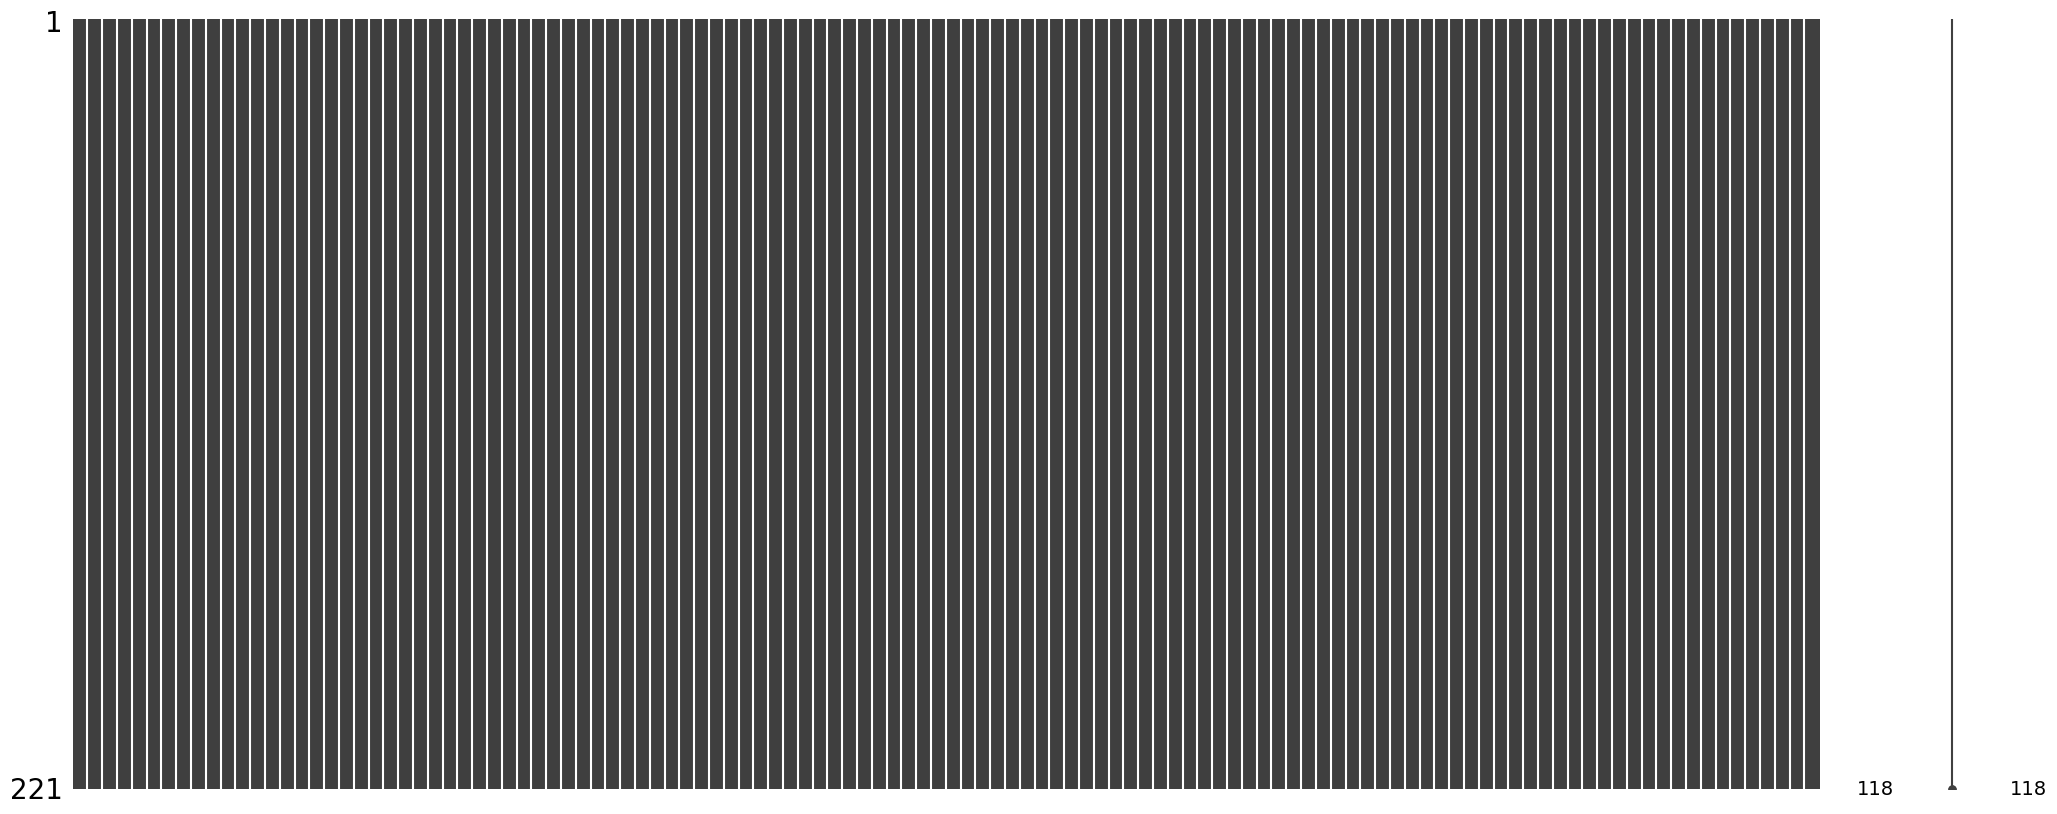

In [ ]:
msno.matrix(df1)

## **2do DF CATEGORICO**

## Eliminar columnas irrelevantes

In [ ]:
df2.head(3)

,Unnamed: 0,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = df2.drop(['Unnamed: 0'], axis='columns')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 2048 entries, Col_0 to Col_2047
dtypes: int64(2048)
memory usage: 3.5 MB


## Revisar si hay NaNs

In [ ]:
df2.isnull().sum().sum() # para ver el total de NaN

0

## **3er DF CATEGORICO**

## Eliminar columnas irrelevantes

In [ ]:
df3.head(3)

,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,8.094413,7.861189,1,0,13.168697,2.318335,4.636669,13.168697,1.197154,...,9.148784,41.129752,154.026609,9.060389,146,15,52.0,59.0,5.194444,2.500000
1,1,11.032230,10.263086,1,0,18.097095,2.335155,4.670310,18.097095,1.206473,...,9.344959,46.399340,211.048072,8.793670,386,20,70.0,78.0,6.805556,3.416667
2,2,12.406004,11.779674,1,0,20.564183,2.348305,4.696611,20.564183,1.209658,...,9.531336,49.175108,241.058637,8.609237,530,25,80.0,91.0,7.916667,3.944444


In [ ]:
df3 = df3.drop(['Unnamed: 0'], axis='columns')

## Revisar si hay NAN

In [ ]:
df3.isnull().sum().sum() # para ver el total de NaN

0

<Axes: >

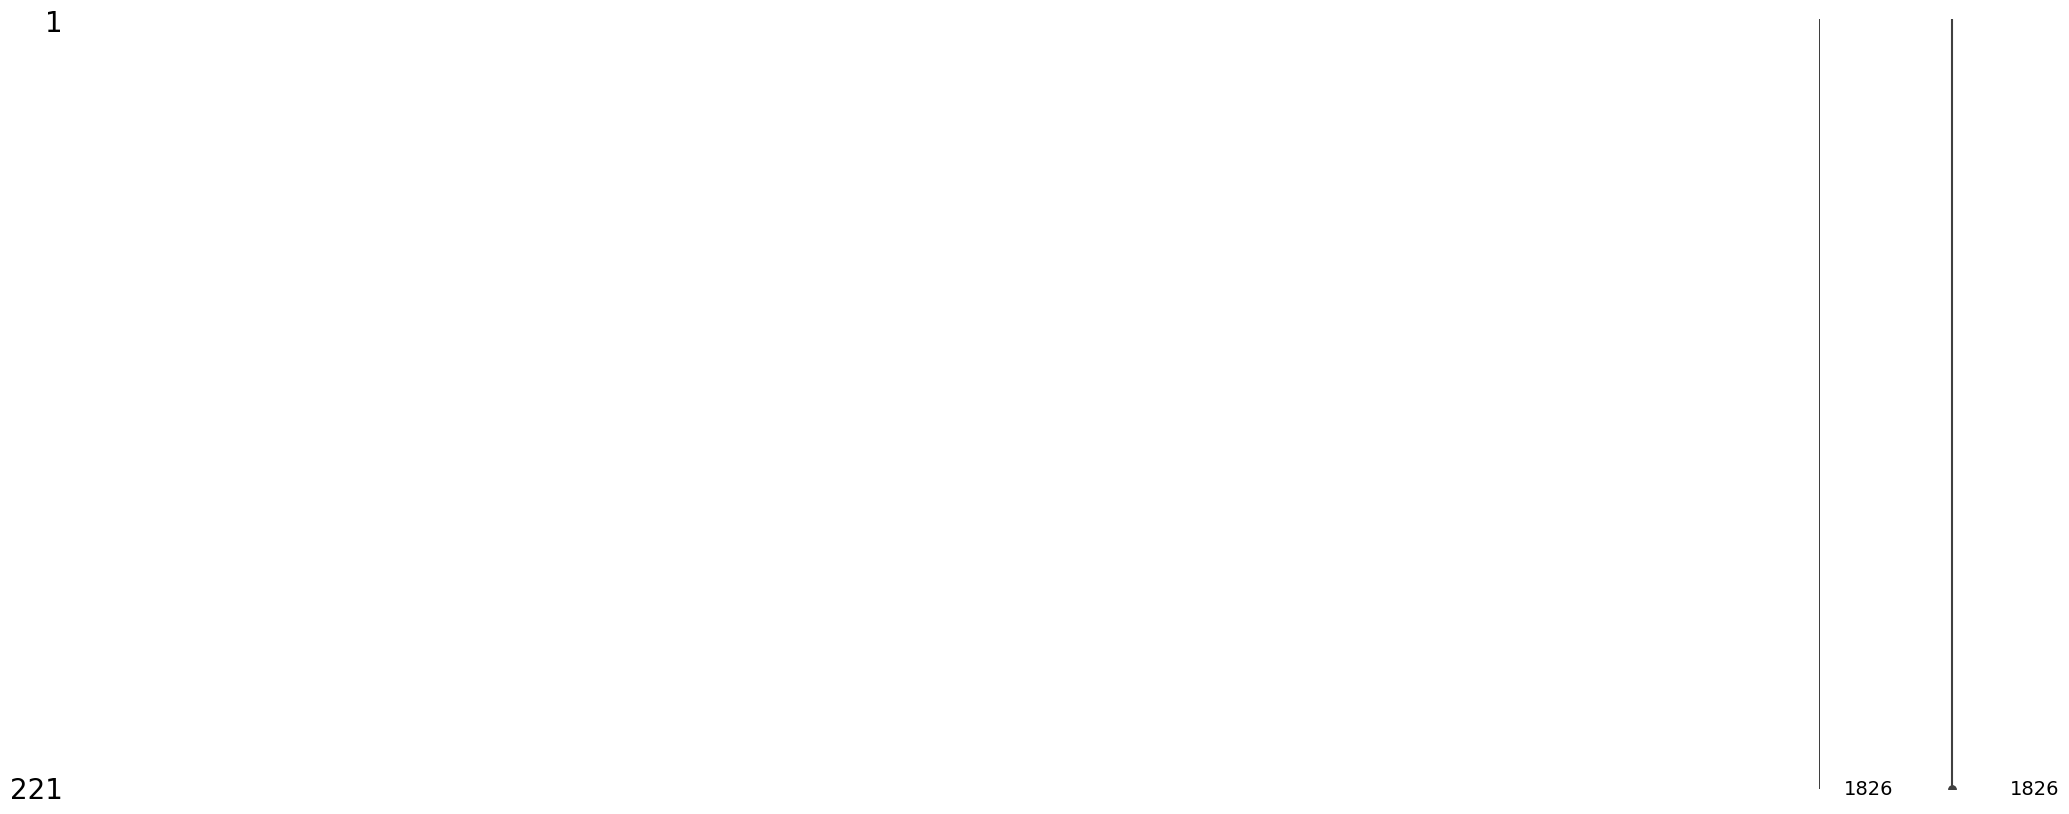

In [ ]:
msno.matrix(df3)

## Conversion a formato adecuado

Convertimos las variables de tipo "objet" a "float64"

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 1826 entries, ABC to mZagreb2
dtypes: bool(2), float64(1002), int64(325), object(497)
memory usage: 3.1+ MB


In [ ]:
df3_objects_colums = df3.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
# función tomada de [1]
def isnumber(x):
  try:
    float(x)
    return True
  except:
    return False

In [ ]:
df3 = df3[df3.applymap(isnumber)]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 1826 entries, ABC to mZagreb2
dtypes: bool(2), float64(1002), int64(325), object(497)
memory usage: 3.1+ MB


In [ ]:
df3_objects_colums = df3.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
for col in df3_objects_colums:
    df3[col] = df3[col].astype('float64')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 1826 entries, ABC to mZagreb2
dtypes: bool(2), float64(1499), int64(325)
memory usage: 3.1 MB


## Revisar si hay NaNs nuevamente

In [ ]:
# para ver el total de NaN, los cuales se concentran en las columnas que previamente eran "object"
df3.isnull().sum().sum()

83432

<Axes: >

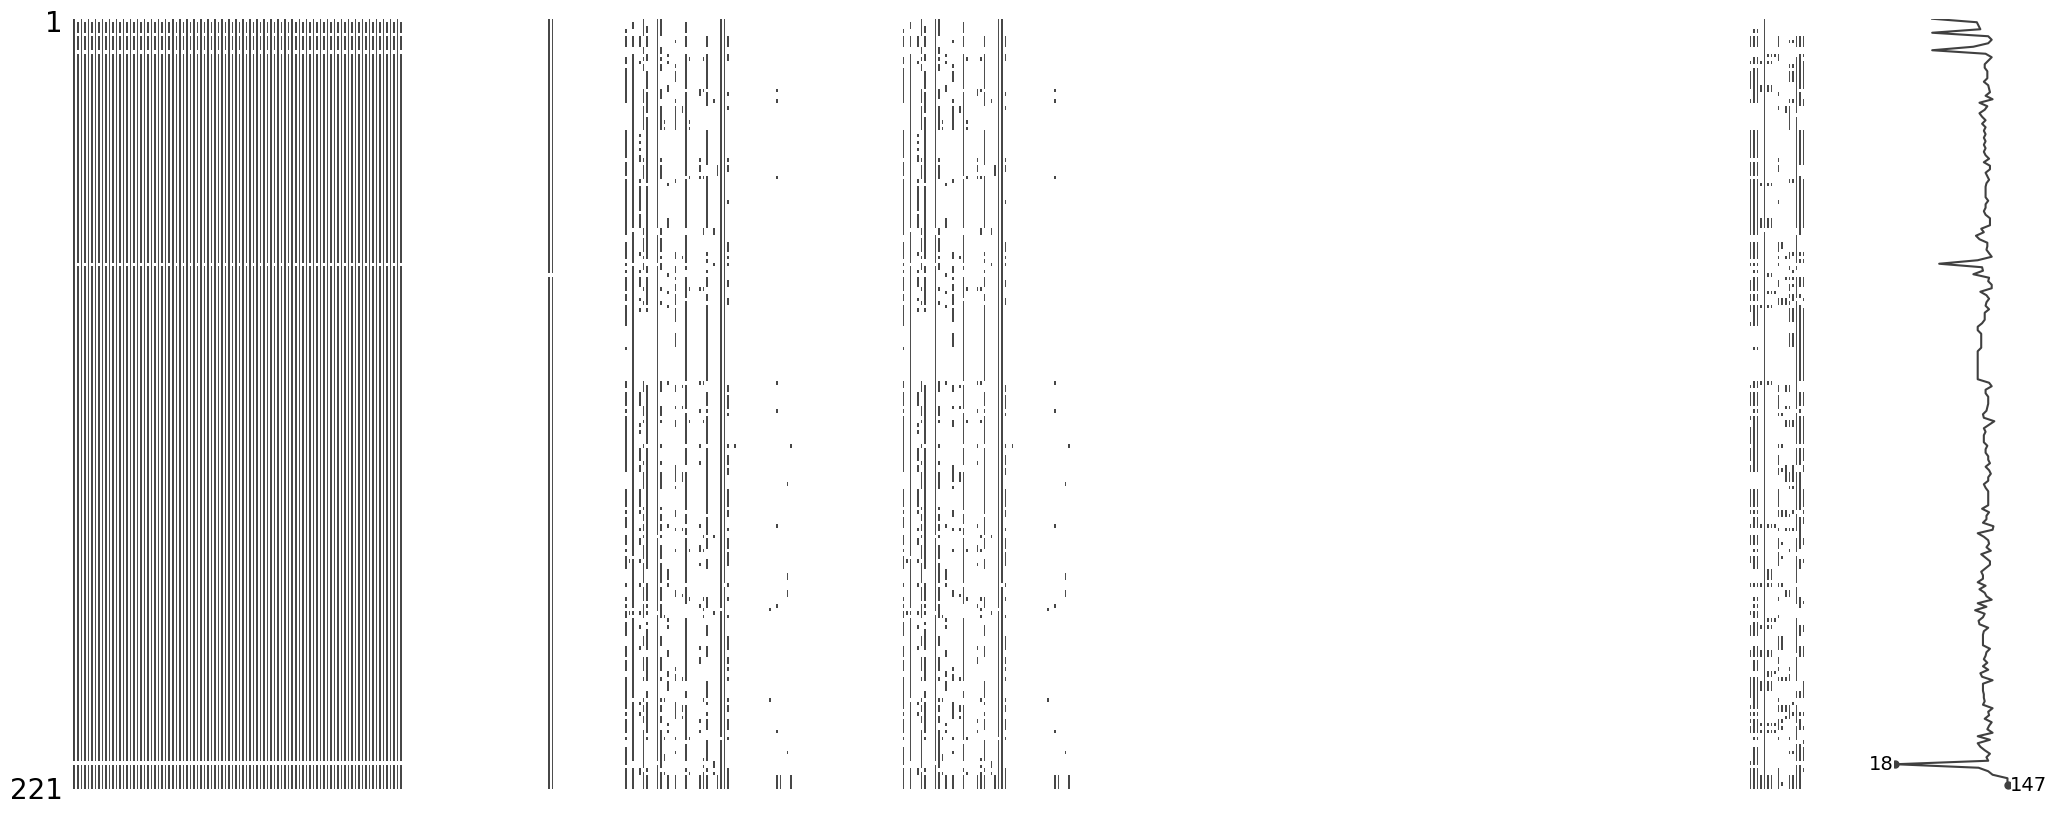

In [ ]:
msno.matrix(df3[df3_objects_colums])

In [ ]:
df3 = df3.dropna(axis='columns', thresh=200)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 1434 entries, ABC to mZagreb2
dtypes: bool(2), float64(1107), int64(325)
memory usage: 2.4 MB


In [ ]:
df3.isnull().sum().sum()

329

<Axes: >

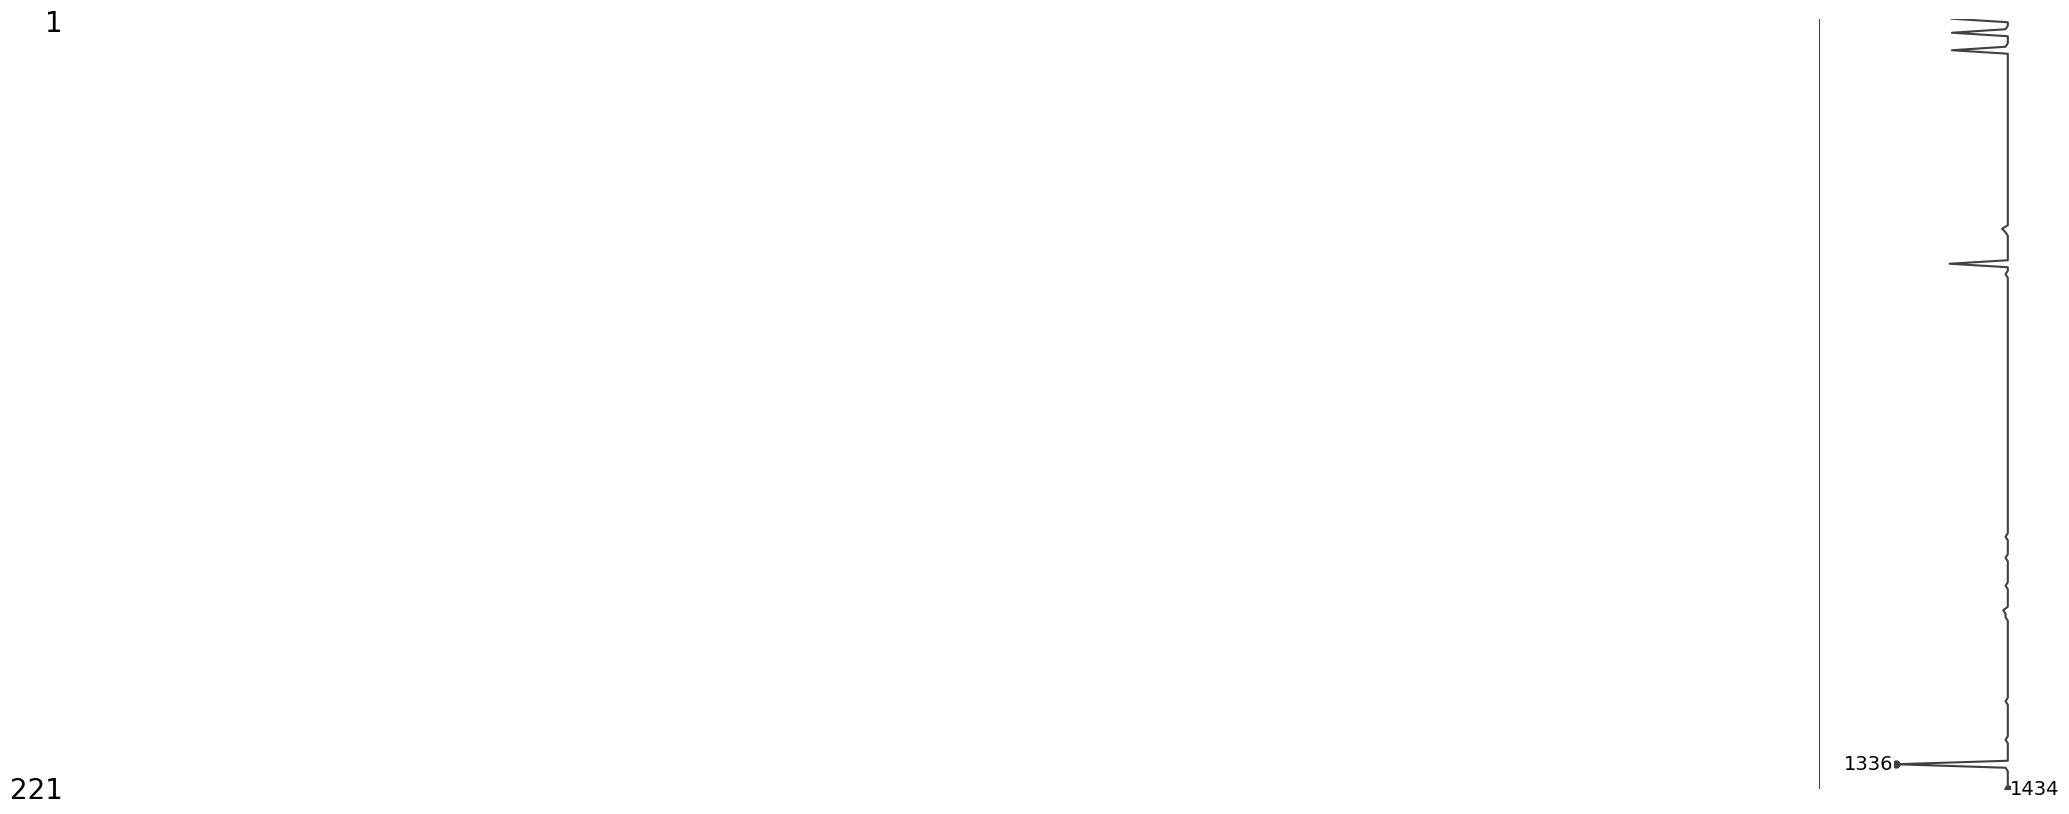

In [ ]:
msno.matrix(df3)

## Imputación de datos

In [ ]:
df3_NaN_columns = df3.columns[df3.isnull().any()].tolist()

In [ ]:
# Reemplazar NaN por el promedio de valores de su respectiva columna
for col in df3_NaN_columns:
  df3[col] = df3[col].fillna(value=df3[col].mean())

# Creacion de las Bases de Datos para el entrenamiento

Resumen de incidencias de sideróforos en la base de datos

* hydroxamate 130
* catecholate 153
* a-hydroxycarboxylate 15
* carboxylate 73
* phenolate 19
* citrate 19
* other 17

De la data analizada sabemos que solo tres sideróforos (hydroxamate, catecholate y carboxylate) tienen la suficiente data, relativamente hablando, para entrenar un modelo de clasificación. Por lo tanto, generaremos **2 bases de datos**, una de clasificación binaria entre hydroxamate y catecholate, que contienen la mayor cantidad de data y están casi balanceados. Y una base de datos de ternaria ebtre hydroxamate, catecholate y carboxylate, en la que analizaremos el balance de la data antes de entrenar el modelo.

## Base de datos binaria (clasificación hydroxamate y catecholate)

In [ ]:
yb = df_target.copy() # creamos la columna target a partir de la base del target dataframe

In [ ]:
# generamos una nueva columna donde si hay presencia solo de 'hydroxamate' es 1 y si hay presencia solo de 'catecholate' es 0, en otros casos se considera NaN
conditionlist = [
    (yb['hydroxamate'] == 0) & (yb['catecholate'] == 1),
    (yb['hydroxamate'] == 1) & (yb['catecholate'] == 0)]
choicelist = [0, 1]
yb['target'] = np.select(conditionlist, choicelist, default=np.nan)

In [ ]:
yb_NaN_pos = yb.isnull().any(axis=1)
yb.dropna(inplace=True)
yb = yb.drop(['hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other'], axis=1)
yb.target = yb.target.astype('int64')

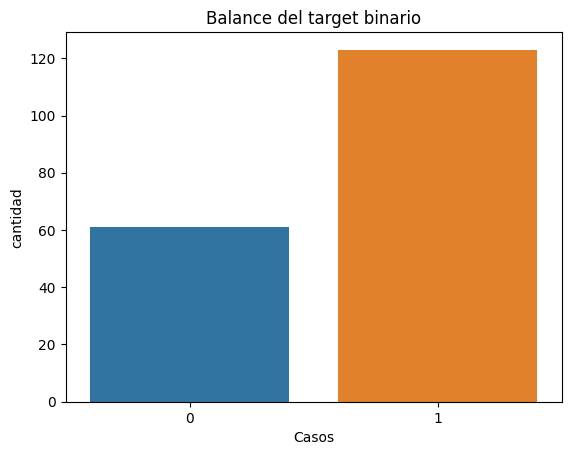

In [ ]:
# creamos un diagrama de barras para ver el balance del target
sns.barplot(x=yb.target.value_counts().index, y=yb.target.value_counts())
plt.xlabel("Casos")
plt.ylabel("cantidad")
plt.title("Balance del target binario")
plt.show()

In [ ]:
# Definimos el conjunto de variables independientes que utilizaremos para entrenar los modelos de target binario
Xb1 = df1.copy() # RDKit
Xb2 = df2.copy() # Morgan fingerprints
Xb3 = df3.copy() # Mordred

# eliminamos las filas en las cuales 'yb' tenia NaN
Xb1.drop(Xb1[yb_NaN_pos].index, inplace=True)
Xb2.drop(Xb2[yb_NaN_pos].index, inplace=True)
Xb3.drop(Xb3[yb_NaN_pos].index, inplace=True)

In [ ]:
yb.shape

(184, 1)

In [ ]:
Xb1.shape

(184, 118)

In [ ]:
Xb2.shape

(184, 2048)

In [ ]:
Xb3.shape

(184, 1434)

## Base de datos ternaria (clasificación hydroxamate, catecholate y carboxylate)

In [ ]:
yt = df_target.copy() # creamos la columna target a partir de la base del target dataframe

In [ ]:
# generamos una nueva columna donde si hay presencia solo de 'hydroxamate' es 2 y si hay presencia solo de 'catecholate' es 1,
# y si hay presencia solo de 'carboxylate' es 0, en otros casos se considera NaN.
conditionlist = [
    (yt['hydroxamate'] == 0) & (yt['catecholate'] == 0) & (yt['carboxylate'] == 1),
    (yt['hydroxamate'] == 0) & (yt['catecholate'] == 1) & (yt['carboxylate'] == 0),
    (yt['hydroxamate'] == 1) & (yt['catecholate'] == 0) & (yt['carboxylate'] == 0)]
choicelist = [0, 1, 2]
yt['target'] = np.select(conditionlist, choicelist, default=np.nan)

In [ ]:
yt_NaN_pos = yt.isnull().any(axis=1)
yt.dropna(inplace=True)
yt = yt.drop(['hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other'], axis=1)
yt.target = yt.target.astype('int64')

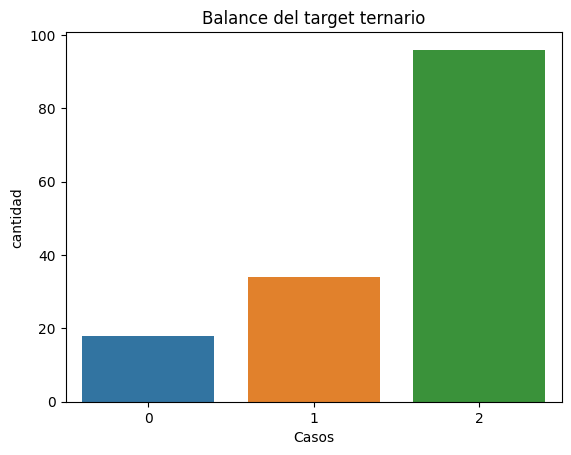

In [ ]:
# creamos un diagrama de barras para ver el balance del target
sns.barplot(x=yt.target.value_counts().index, y=yt.target.value_counts())
plt.xlabel("Casos")
plt.ylabel("cantidad")
plt.title("Balance del target ternario")
plt.show()

In [ ]:
# Definimos el conjunto de variables independientes que utilizaremos para entrenar los modelos de target ternario
Xt1 = df1.copy() # RDKit
Xt2 = df2.copy() # Morgan fingerprints
Xt3 = df3.copy() # Mordred

# eliminamos las filas en las cuales 'yt' tenia NaN
Xt1.drop(Xt1[yt_NaN_pos].index, inplace=True)
Xt2.drop(Xt2[yt_NaN_pos].index, inplace=True)
Xt3.drop(Xt3[yt_NaN_pos].index, inplace=True)

In [ ]:
yt.shape

(148, 1)

In [ ]:
Xt1.shape

(148, 118)

In [ ]:
Xt2.shape

(148, 2048)

In [ ]:
Xt3.shape

(148, 1434)

Finalmente, hemos obtenido 6 bases de datos, 3 de las cuales serán utilizadas para una categorización binaria, y en las que se comparará que descriptor (RDKit, Morgan fingerprints o Mordred), proporciona un mejor resultado. Las otras 3 bases de datos serán utilizadas para una categorización terciaria, en la que también se compararan la performance de los descriptores. Es necesario aclarar que la data generada esta desbalanceada, no obstante, se realizaran los modelos de entrenamiento y analizaremos los resultados.

### **Bases de datos:**

* Xb1 + yb : clasificación binaria descriptor RDKit
* Xb2 + yb : clasificación binaria descriptor Morgan fingerprints
* Xb3 + yb : clasificación binaria descriptor Mordred
* Xt1 + yt : clasificación ternaria descriptor RDKit
* Xt2 + yt : clasificación ternaria descriptor Morgan fingerprints
* Xt3 + yt : clasificación ternaria descriptor Mordred

# Modelos ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

## Caso Xb1 + yb : clasificación binaria descriptor RDKit

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(Xb1, yb, random_state=42)

#### SVM

In [ ]:
svm1b = SVC(kernel='linear', C=1.0)
svm1b.fit(data_train,target_train)
y_pred1b = svm1b.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Modelo SVM para Xb1 + yb:\n")
print(classification_report(target_test, y_pred1b))

Modelo SVM para Xb1 + yb:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        36

    accuracy                           0.96        46
   macro avg       0.94      0.94      0.94        46
weighted avg       0.96      0.96      0.96        46



#### KNN

In [ ]:
knn1b = KNeighborsClassifier(n_neighbors=3)
knn1b.fit(data_train,target_train)
y_pred1b = knn1b.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("Modelo KNN para Xb1 + yb:\n")
print(classification_report(target_test, y_pred1b))

Modelo KNN para Xb1 + yb:

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.94      0.83      0.88        36

    accuracy                           0.83        46
   macro avg       0.75      0.82      0.77        46
weighted avg       0.86      0.83      0.84        46



## Caso Xb2 + yb : clasificación binaria descriptor Morgan fingerprints

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(Xb2, yb, random_state=42)

#### SVM

In [ ]:
svm2b = SVC(kernel='linear', C=1.0)
svm2b.fit(data_train,target_train)
y_pred2b = svm2b.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Modelo SVM para Xb2 + yb:\n")
print(classification_report(target_test, y_pred2b))

Modelo SVM para Xb2 + yb:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        36

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



#### KNN

In [ ]:
knn2b = KNeighborsClassifier(n_neighbors=3)
knn2b.fit(data_train,target_train)
y_pred2b = knn2b.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("Modelo KNN para Xb2 + yb:\n")
print(classification_report(target_test, y_pred2b))

Modelo KNN para Xb2 + yb:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        36

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



## Caso Xb3 + yb : clasificación binaria descriptor Mordred

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(Xb3, yb, random_state=42)

#### SVM

In [ ]:
svm3b = SVC(kernel='linear', C=1.0)
svm3b.fit(data_train,target_train)
y_pred3b = svm3b.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Modelo SVM para Xb3 + yb:\n")
print(classification_report(target_test, y_pred3b))

Modelo SVM para Xb3 + yb:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.92      0.96        36

    accuracy                           0.93        46
   macro avg       0.88      0.96      0.91        46
weighted avg       0.95      0.93      0.94        46



#### KNN

In [ ]:
knn3b = KNeighborsClassifier(n_neighbors=3)
knn3b.fit(data_train,target_train)
y_pred3b = knn3b.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("Modelo KNN para Xb3 + yb:\n")
print(classification_report(target_test, y_pred3b))

Modelo KNN para Xb3 + yb:

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.94      0.86      0.90        36

    accuracy                           0.85        46
   macro avg       0.78      0.83      0.80        46
weighted avg       0.87      0.85      0.85        46



## Caso Xt1 + yt : clasificación ternaria descriptor RDKit

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(Xt1, yt, random_state=42)

#### SVM

In [ ]:
svm1t = SVC(kernel='linear', C=1.0)
svm1t.fit(data_train,target_train)
y_pred1t = svm1t.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Modelo SVM para Xt1 + yt:\n")
print(classification_report(target_test, y_pred1t))

Modelo SVM para Xt1 + yt:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.90      0.90      0.90        10
           2       0.95      0.95      0.95        22

    accuracy                           0.92        37
   macro avg       0.88      0.88      0.88        37
weighted avg       0.92      0.92      0.92        37



#### KNN

In [ ]:
knn1t = KNeighborsClassifier(n_neighbors=3)
knn1t.fit(data_train,target_train)
y_pred1t = knn1t.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("Modelo KNN para Xt1 + yt:\n")
print(classification_report(target_test, y_pred1t))

Modelo KNN para Xt1 + yt:

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.38      0.30      0.33        10
           2       0.70      0.86      0.78        22

    accuracy                           0.65        37
   macro avg       0.69      0.52      0.56        37
weighted avg       0.65      0.65      0.63        37



## Caso Xt2 + yt : clasificación ternaria descriptor Morgan fingerprints

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(Xt2, yt, random_state=42)

#### SVM

In [ ]:
svm2t = SVC(kernel='linear', C=1.0)
svm2t.fit(data_train,target_train)
y_pred2t = svm2t.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Modelo SVM para Xt2 + yt:\n")
print(classification_report(target_test, y_pred1t))

Modelo SVM para Xt2 + yt:

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.38      0.30      0.33        10
           2       0.70      0.86      0.78        22

    accuracy                           0.65        37
   macro avg       0.69      0.52      0.56        37
weighted avg       0.65      0.65      0.63        37



#### KNN

In [ ]:
knn2t = KNeighborsClassifier(n_neighbors=3)
knn2t.fit(data_train,target_train)
y_pred2t = knn2t.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("Modelo KNN para Xt2 + yt:\n")
print(classification_report(target_test, y_pred2t))

Modelo KNN para Xt2 + yt:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        22

    accuracy                           0.97        37
   macro avg       0.97      0.93      0.95        37
weighted avg       0.98      0.97      0.97        37



## Caso Xt3 + yt : clasificación ternaria descriptor Mordred

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(Xt3, yt, random_state=42)

#### SVM

In [ ]:
svm3t = SVC(kernel='linear', C=1.0)
svm3t.fit(data_train,target_train)
y_pred3t = svm3t.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Modelo SVM para Xt3 + yt:\n")
print(classification_report(target_test, y_pred3t))

Modelo SVM para Xt3 + yt:

              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.83      0.50      0.62        10
           2       0.96      1.00      0.98        22

    accuracy                           0.84        37
   macro avg       0.76      0.77      0.74        37
weighted avg       0.86      0.84      0.83        37



#### KNN

In [ ]:
knn3t = KNeighborsClassifier(n_neighbors=3)
knn3t.fit(data_train,target_train)
y_pred3t = knn3t.predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("Modelo KNN para Xt3 + yt:\n")
print(classification_report(target_test, y_pred3t))

Modelo KNN para Xt3 + yt:

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.40      0.20      0.27        10
           2       0.74      0.91      0.82        22

    accuracy                           0.68        37
   macro avg       0.58      0.57      0.56        37
weighted avg       0.63      0.68      0.64        37



## Evaluación del desempeño de los modelos

In [ ]:
acctab = pd.DataFrame()

acctab['Xb1'] = None
acctab['Xb2'] = None
acctab['Xb3'] = None
acctab['Xt1'] = None
acctab['Xt2'] = None
acctab['Xt3'] = None

# añadimos filas por su nombre de fila
acctab.loc['SVM'] = [0.96, 1.00, 0.93, 0.92, 0.65, 0.84]
acctab.loc['KNN'] = [0.83, 1.00, 0.85, 0.65, 0.97, 0.68]

acctab # accuracy tab

,Xb1,Xb2,Xb3,Xt1,Xt2,Xt3
SVM,0.96,1.0,0.93,0.92,0.65,0.84
KNN,0.83,1.0,0.85,0.65,0.97,0.68


# Conclusiones

*   Los modelos fueron entrenados con data no balanceada, sobre todo para el caso de clasificación con tres categorias. La utilización de data imbalanceada suele introducir sesgo al modelo a fovor de la categoría que predomina [2], por tal motivo, los resultados pueden no ser confiables.
*   En la clasificación hydroxamate y catecholate, **SVM** obtiene el mayor accuracy de los dos modelos para los tres clasificadores. Donde el clasificador con mejor performance es el **Morgan fingerprints**
*   En la clasificación hydroxamate, catecholate y carboxylate, **SVM** obtiene el mayor accuracy para los clasificadores **RDKit** y **Mordred**. Y **KNN** obtiene el mayor accuracy para el clasificador **Morgan fingerprints**
*   En los modelos de SVM para la clasificación hydroxamate y catecholate, la precision siempre es mayor para la categoría 'catecholate', por lo que es importante recordar que la data imbalanceada se encuentra a favor de esta categoría, por lo tanto, altera este score [3].
*   En los mejores modelos para la clasificación hydroxamate, catecholate y carboxylate ocurre algo similar a lo anterior, y la categoría con mayor precision es 'carboxylate', la cual también presenta un balance a favor [3].


[1] Python Program to Check If a String Is a Number (Float). (s.f.). Programiz: Learn to Code for Free. https://www.programiz.com/python-programming/examples/check-string-number

[2] Balanced and Imbalanced Datasets in Machine Learning [Introduction]. (s.f.). Encord | Data-Centric AI Development Software for Computer Vision. https://encord.com/blog/an-introduction-to-balanced-and-imbalanced-datasets-in-machine-learning/

[3] Precision, Recall, F1, Accuracy en clasificación - IArtificial.net. (s.f.). IArtificial.net. https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/